In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
dataset = pd.read_csv('kc_house_data.csv')

In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Descriptive Statistics

In [5]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
corr = dataset.corr()

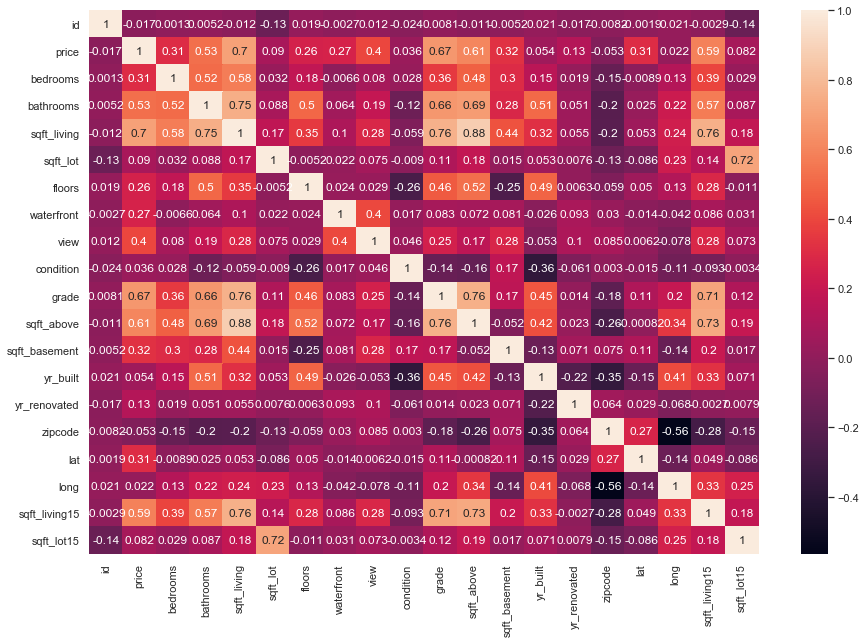

In [8]:
sns.set(rc={'figure.figsize': (15, 10)})
sns.heatmap(corr, annot=True)


In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
# Variables Which are Highly correlated 
corr_columns = correlation(dataset, 0.7)
print(corr_columns)

{'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'grade'}


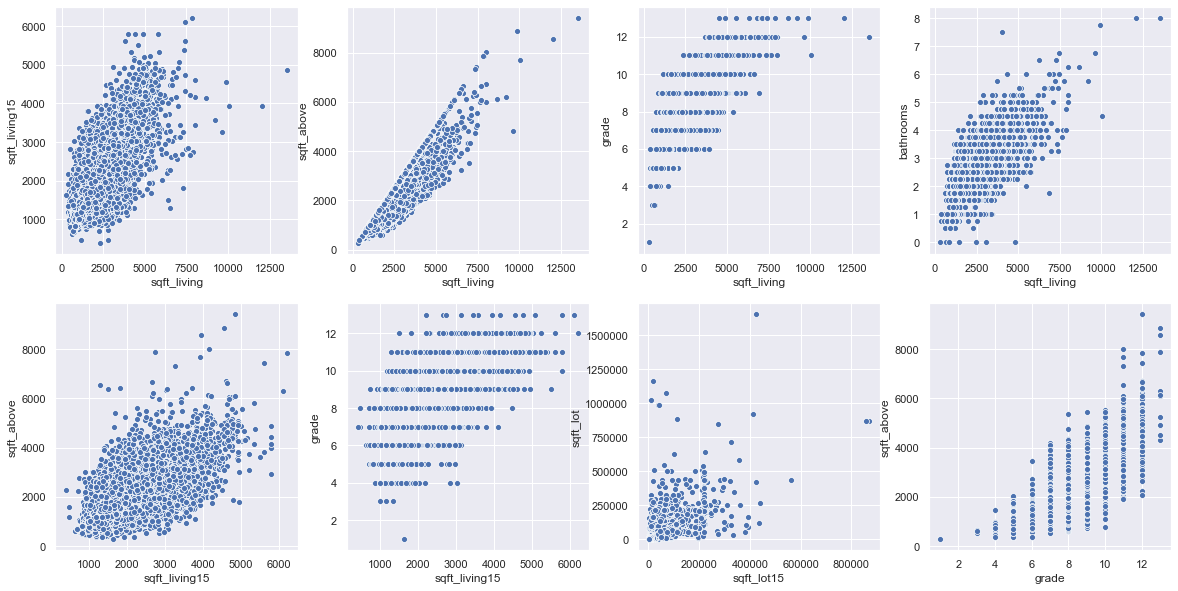

In [11]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)

sns.scatterplot(data=dataset, x='sqft_living', y='sqft_living15', ax=ax[0][0])
sns.scatterplot(data=dataset, x='sqft_living', y='sqft_above', ax=ax[0][1])
sns.scatterplot(data=dataset, x='sqft_living', y='grade', ax=ax[0][2])
sns.scatterplot(data=dataset, x='sqft_living', y='bathrooms', ax=ax[0][3])
sns.scatterplot(data=dataset, x='sqft_living15', y='sqft_above', ax=ax[1][0])
sns.scatterplot(data=dataset, x='sqft_living15', y='grade', ax=ax[1][1])
sns.scatterplot(data=dataset, x='sqft_lot15', y='sqft_lot', ax=ax[1][2])
sns.scatterplot(data=dataset, x='grade', y='sqft_above', ax=ax[1][3])



In [12]:
dataset.drop(['id', 'date'], axis=1, inplace=True)
#dataset.drop('date', axis=1, inplace=True)

In [13]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
#dataset.drop(['sqft_lot', 'condition', 'yr_built', 'zipcode', 'long'], axis=1, inplace=True)

In [15]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


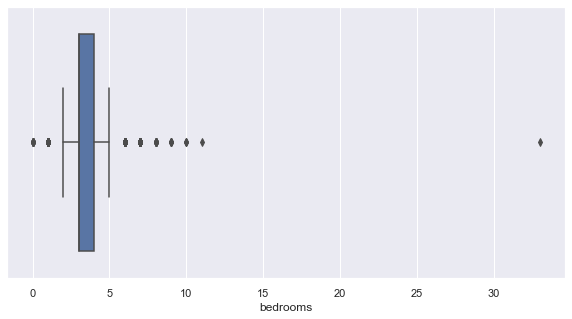

In [17]:
#Checking for outliers
sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot(dataset['bedrooms'])

In [18]:
print(dataset['bedrooms'].skew())
dataset['bedrooms'].describe()

1.97429953543601


count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

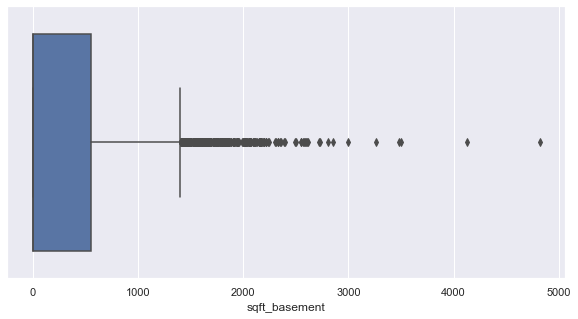

In [19]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot(dataset['sqft_basement'])

In [20]:
print(dataset['sqft_basement'].skew())
dataset['sqft_basement'].describe()

1.5779650555996247


count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

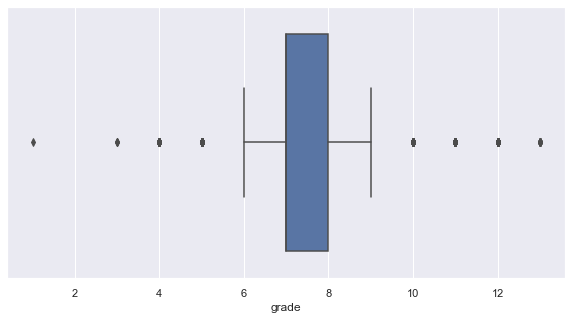

In [21]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot(dataset['grade'])

In [22]:
print(dataset['grade'].skew())
dataset['grade'].describe()

0.7711032007576067


count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

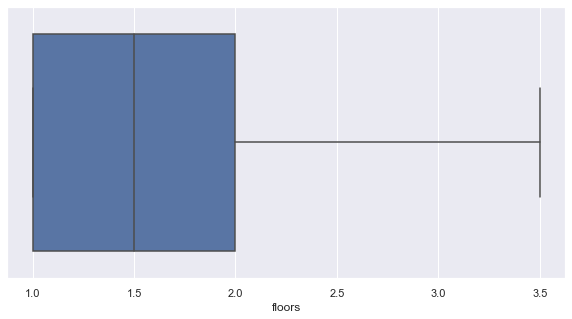

In [23]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot(dataset['floors'])

In [24]:
print(dataset['floors'].skew())
dataset['floors'].describe()

0.616176721157611


count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

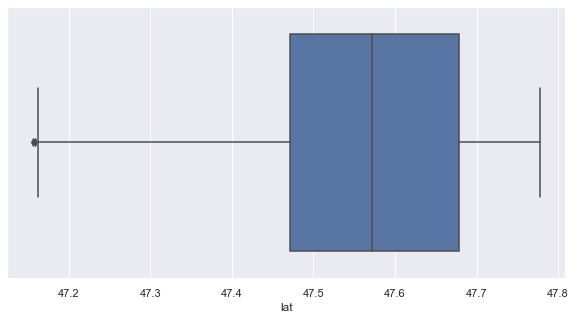

In [25]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot(dataset['lat'])

In [26]:
print(dataset['lat'].skew())
dataset['lat'].describe()

-0.4852704765380861


count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

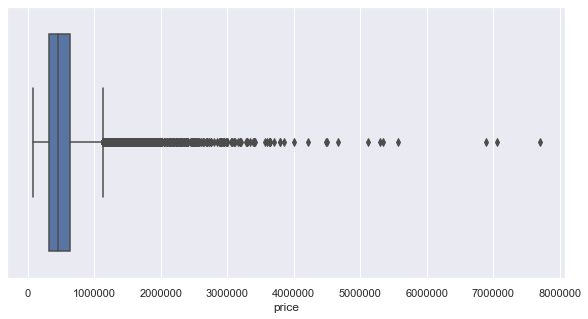

In [27]:
sns.boxplot(dataset['price'])

In [28]:
print(dataset['price'].skew())
dataset['price'].describe()

4.024069144684712


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [29]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [30]:
dataset['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [31]:
# Handling Outliers

# price
#Q1 & Q2 defination
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

dataset['price'] = np.where(dataset['price']>upper_limit,dataset['price'].quantile(0.75),dataset['price'])
dataset['price'] = np.where(dataset['price']<lower_limit,dataset['price'].quantile(0.25),dataset['price'])




Q1: 321950.0
Q3:  645000.0
IQR:  323050.0
Lower limit:  -162625.0
Upper limit:  1129575.0


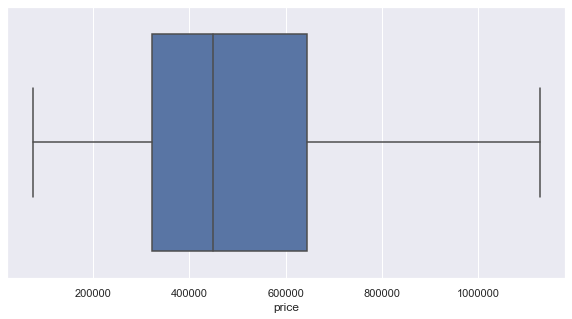

In [32]:
sns.boxplot(dataset['price'])

In [33]:
print(dataset['bedrooms'].describe())
print(dataset['bedrooms'].median())
print(dataset['bedrooms'].mean())

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64
3.0
3.37084162309721


In [34]:
#bedrooms

#Q1 & Q2 defination
Q1 = dataset['bedrooms'].quantile(0.25)
Q3 = dataset['bedrooms'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

dataset['bedrooms'] = np.where(dataset['bedrooms']>upper_limit,dataset['bedrooms'].median(),dataset['bedrooms'])
dataset['bedrooms'] = np.where(dataset['bedrooms']<lower_limit,dataset['bedrooms'].median(),dataset['bedrooms'])

Q1: 3.0
Q3:  4.0
IQR:  1.0
Lower limit:  1.5
Upper limit:  5.5


In [35]:
dataset['bathrooms'].median()

2.25

In [36]:
#bathrooms

#Q1 & Q2 defination
Q1 = dataset['bathrooms'].quantile(0.25)
Q3 = dataset['bathrooms'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

dataset['bathrooms'] = np.where(dataset['bathrooms']>upper_limit,2.25,dataset['bathrooms'])
dataset['bathrooms'] = np.where(dataset['bathrooms']<lower_limit,2.25,dataset['bathrooms'])




Q1: 1.75
Q3:  2.5
IQR:  0.75
Lower limit:  0.625
Upper limit:  3.625


In [37]:
dataset['grade'].median()

7.0

In [38]:
#grade

Q1 = dataset['grade'].quantile(0.25)
Q3 = dataset['grade'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

dataset['grade'] = np.where(dataset['grade']>upper_limit,7.0,dataset['grade'])
dataset['grade'] = np.where(dataset['grade']<lower_limit,7.0,dataset['grade'])

#Q1 & Q2 defination


Q1: 7.0
Q3:  8.0
IQR:  1.0
Lower limit:  5.5
Upper limit:  9.5


In [39]:
print(dataset['sqft_basement'].describe())
print(dataset['sqft_basement'].mean())
print(dataset['sqft_basement'].median())

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64
291.5090454818859
0.0


In [40]:
#sqft_basement

#Q1 & Q2 defination
Q1 = dataset['sqft_basement'].quantile(0.25)
Q3 = dataset['sqft_basement'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

dataset['sqft_basement'] = np.where(dataset['sqft_basement']>upper_limit,upper_limit,dataset['sqft_basement'])
dataset['sqft_basement'] = np.where(dataset['sqft_basement']<lower_limit,0.0,dataset['sqft_basement'])

Q1: 0.0
Q3:  560.0
IQR:  560.0
Lower limit:  -840.0
Upper limit:  1400.0


In [41]:
print(dataset['lat'].describe())
print(dataset['lat'].mean())
print(dataset['lat'].median())

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64
47.56005251931704
47.5718


In [42]:
#lat

#Q1 & Q2 defination
Q1 = dataset['lat'].quantile(0.25)
Q3 = dataset['lat'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

dataset['lat'] = np.where(dataset['lat']>upper_limit,dataset['lat'].mean(),dataset['lat'])
dataset['lat'] = np.where(dataset['lat']<lower_limit,dataset['lat'].mean(),dataset['lat'])

Q1: 47.471000000000004
Q3:  47.678000000000004
IQR:  0.20700000000000074
Lower limit:  47.1605
Upper limit:  47.9885


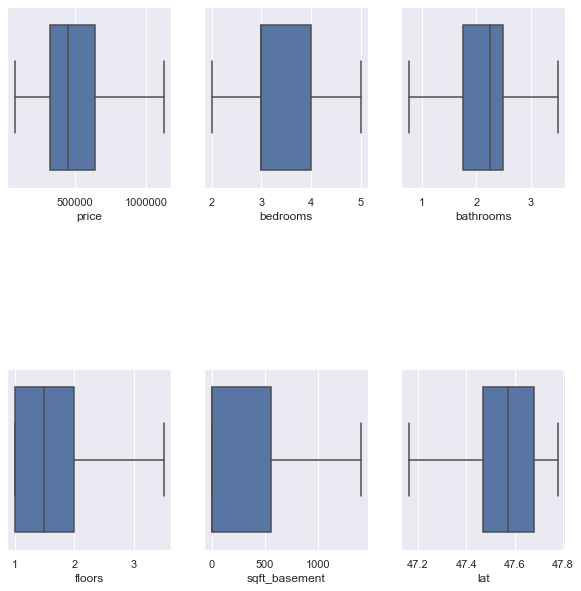

In [43]:
f,ax=plt.subplots(figsize=(10, 10),nrows=2,ncols=3)
plt.subplots_adjust(hspace=1)

sns.boxplot(dataset['price'],data=dataset,ax=ax[0][0])
sns.boxplot(dataset['bedrooms'],data=dataset,ax=ax[0][1])
sns.boxplot(dataset['bathrooms'],data=dataset,ax=ax[0][2])
sns.boxplot(dataset['floors'],data=dataset,ax=ax[1][0])
sns.boxplot(dataset['sqft_basement'],data=dataset,ax=ax[1][1])
sns.boxplot(dataset['lat'],data=dataset,ax=ax[1][2])

In [44]:
dataset.drop(corr_columns, axis=1, inplace=True)

In [45]:
X = dataset.drop('price',axis=1)
y = dataset['price']

In [46]:
X.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,3.0,1.00,5650,1.0,0,0,3,0.0,1955,0,98178,47.5112,-122.257
1,3.0,2.25,7242,2.0,0,0,3,400.0,1951,1991,98125,47.7210,-122.319
2,2.0,1.00,10000,1.0,0,0,3,0.0,1933,0,98028,47.7379,-122.233
3,4.0,3.00,5000,1.0,0,0,5,910.0,1965,0,98136,47.5208,-122.393
4,3.0,2.00,8080,1.0,0,0,3,0.0,1987,0,98074,47.6168,-122.045


In [47]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [48]:
# To obtain interval estimates or to test statistical hypotheses about parameter values,
# we need the response variable to distribute normally.
#y = np.log(y)

In [49]:
X = np.array(X)

In [50]:
X

array([[ 3.00000e+00,  1.00000e+00,  5.65000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  7.24200e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  1.00000e+04, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.35000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  2.38800e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.07600e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [51]:
y = np.array(y)

In [52]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
corr_columns

{'grade', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot15'}

In [55]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler() 
sc_X_test = StandardScaler()

sc_y_train = StandardScaler()
sc_y_test = StandardScaler()

X_train = sc_X_train.fit_transform(X_train)
X_test = sc_X_test.fit_transform(X_test)

# Reshaping 'y' into 2D beacuse StandardScaler class takes 2D as input
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

y_train = sc_y_train.fit_transform(y_train)
y_test = sc_y_test.fit_transform(y_test)



In [56]:
print(y_train)
print(y_test)

[[ 0.04005881]
 [ 0.72137962]
 [-0.50743112]
 ...
 [-0.27140213]
 [-0.36873367]
 [ 1.03722048]]
[[-0.88634555]
 [ 0.77740962]
 [ 0.38107254]
 ...
 [-0.53757849]
 [-0.87200284]
 [ 0.44728808]]


In [57]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [58]:
print(y_train)
print(y_test)

[ 0.04005881  0.72137962 -0.50743112 ... -0.27140213 -0.36873367
  1.03722048]
[-0.88634555  0.77740962  0.38107254 ... -0.53757849 -0.87200284
  0.44728808]


## Algorithms.

## SVR (Support Vector Regression)

In [59]:
# SVR (Support vector Regression)
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
y_pred_svr = regressor_svr.predict(X_test)

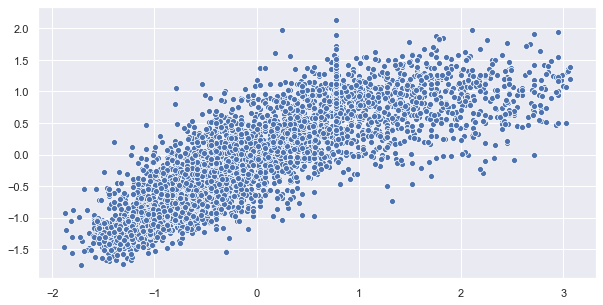

In [61]:
np.set_printoptions(precision=2)
sns.scatterplot(y_test, y_pred_svr)

In [62]:
r2_score(y_test, y_pred_svr)

0.6828029556860594

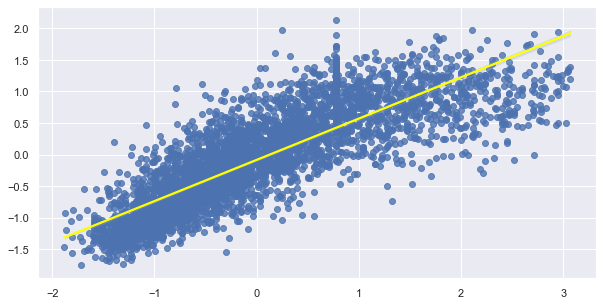

In [63]:
sns.set(rc={'figure.figsize': (10, 5)})
g=sns.regplot(y_test, y_pred_svr)
regline = g.get_lines()[0]
regline.set_color('yellow')

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


print('mean_squared_error: ', mean_squared_error(y_test, y_pred_svr))
print('root_mean_squared_error: ', math.sqrt(mean_squared_error(y_test, y_pred_svr)))
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred_svr))



mean_squared_error:  0.3171970443139406
root_mean_squared_error:  0.5632024896197997
mean_absolute_error:  0.39244642410730624


## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = regressor.predict(X_test)

In [67]:
np.set_printoptions(precision=2)

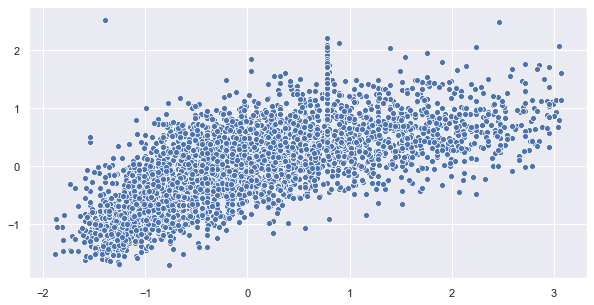

In [68]:
sns.scatterplot(y_test, y_pred)

In [69]:
r2_score(y_test, y_pred)

0.4799055974750086

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))



0.5200944025249914
0.7211757084961968
0.5473860108490811


In [71]:
dataset.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3.0,1.00,5650,1.0,0,0,3,0.0,1955,0,98178,47.5112,-122.257
1,538000.0,3.0,2.25,7242,2.0,0,0,3,400.0,1951,1991,98125,47.7210,-122.319
2,180000.0,2.0,1.00,10000,1.0,0,0,3,0.0,1933,0,98028,47.7379,-122.233
3,604000.0,4.0,3.00,5000,1.0,0,0,5,910.0,1965,0,98136,47.5208,-122.393
4,510000.0,3.0,2.00,8080,1.0,0,0,3,0.0,1987,0,98074,47.6168,-122.045


## Ordinary Least Squares

In [72]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='price ~ bedrooms +bathrooms +floors+sqft_lot +waterfront +view+condition +sqft_basement+ yr_built+yr_renovated + lat+long', data=dataset).fit()
lm1.params


Intercept       -1.416839e+07
bedrooms         2.891455e+04
bathrooms        9.755917e+04
floors           6.767727e+04
sqft_lot         4.349671e-01
waterfront      -3.173560e+04
view             4.422752e+04
condition        2.232294e+04
sqft_basement    3.833064e+01
yr_built        -9.657690e+02
yr_renovated     1.272451e+01
lat              6.200201e+05
long             1.099236e+05
dtype: float64

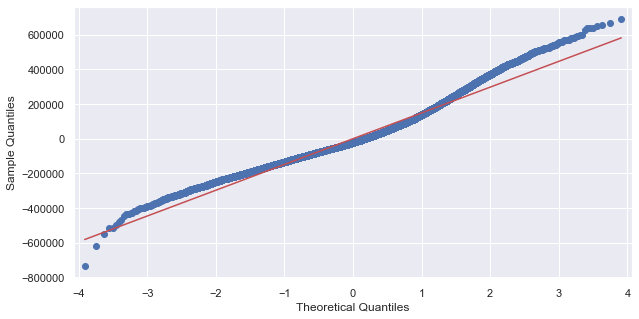

In [75]:
res = lm1.resid

import statsmodels.api as sm
fig = sm.qqplot(res, line='s')

# From the figure, we see that all data points lie to close to the 45-degree line and hence we can conclude that it follows Normal Distribution.

In [76]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     1661.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:07:01   Log-Likelihood:            -2.8807e+05
No. Observations:               21613   AIC:                         5.762e+05
Df Residuals:                   21600   BIC:                         5.763e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.417e+07   1.11e+06    -12.712      0.000   -1.64e+07    -1.2e+07
bedrooms       2.891e+04   1489.101     19.417      0.000     2.6e+04    3.18e+04
bathrooms      9.756e+04   2310.260     42.229      0.000     9.3e+04    1.02e+05
floors         6.768e+04   2552.280     26.516      0.000    6.27e+04    7.27e+04
sqft_lot          0.4350      0.025     17.188      0.000       0.385       0.485
waterfront    -3.174e+04   1.28e+04     -2.476      0.013   -5.69e+04   -6611.730
view           4.423e+04   1511.658     29.258      0.000    4.13e+04    4.72e+04
condition      2.232e+04   1727.997     12.918      0.000    1.89e+04    2.57e+04
sqft_basement    38.3306      3.049     12.571      0.000      32.354      44.307
yr_built       -965.7690     52.013    -18.568      0.000   -1067.718    -863.820
yr_renovated     12.7245      2.694      4.723      0.000       7.443      18.006
lat              6.2e+05   7603.248     81.547      0.000    6.05e+05    6.35e+05
long           1.099e+05   8356.875     13.154      0.000    9.35e+04    1.26e+05
==============================================================================
Omnibus:                     2053.267   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2950.966
Skew:                           0.750   Prob(JB):                         0.00
Kurtosis:                       4.013   Cond. No.                     4.86e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

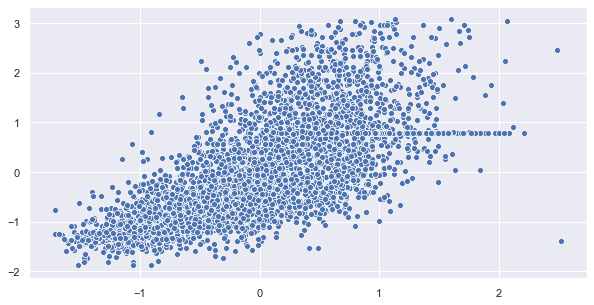

In [77]:
sns.scatterplot(x=y_pred, y=y_test)

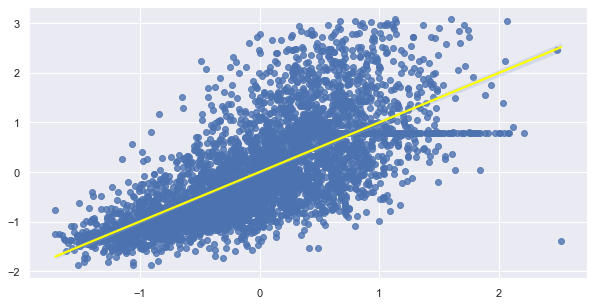

In [78]:
g=sns.regplot(x=y_pred, y=y_test)
regline = g.get_lines()[0]
regline.set_color('yellow')

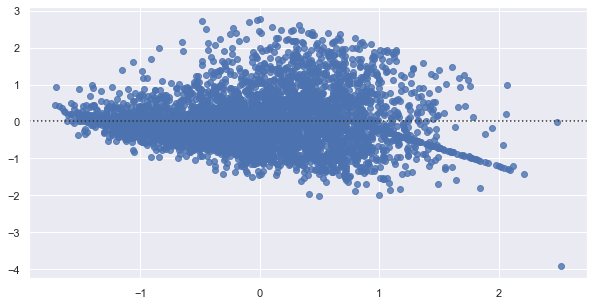

In [79]:
sns.residplot(x=y_pred, y=y_test)

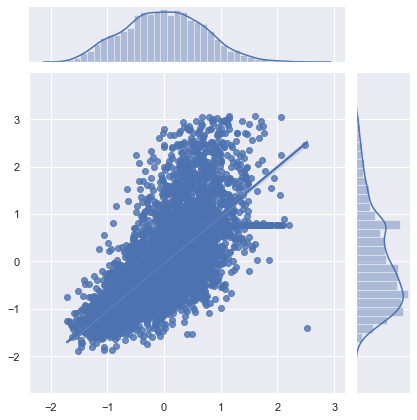

In [80]:
sns.jointplot(x=y_pred, y=y_test,kind="reg")
regline = g.get_lines()[0]
regline.set_color('yellow')

## Practice